# Comparing STSF to pYIN
Date: May 10, 2023

## Goal: See where pYIN is messing up (if at all) by comparing to STSF data.

## Results: pYIN is fucking up badly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

# Read In File

In [2]:
filename = '108-42.aiff'

# Load in via `librosa`
samples, sr = librosa.load(filename, mono=False)

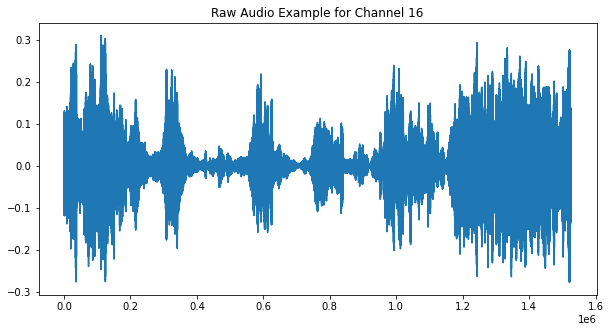

In [3]:
channel = 16
pd.Series(samples[channel - 1]).plot(figsize=(10,5), title=f'Raw Audio Example for Channel {channel}')
plt.show()

# Let's do STFT and pYIN to see if it's working properly...

In [4]:
from scipy import signal

In [5]:
# VARIABLES
nperseg = 4500

channel = 2
t_i = 0
t_f = None
if t_f == None:
    t_f = sr * channel

    
# Setup
fs = sr
target_range = slice(t_i * fs ,t_f * fs)
x = samples[channel - 1][target_range]

# Run STFT
f, t, Zxx = signal.stft(x, fs, nperseg=nperseg)

print(np.abs(Zxx).min(), np.abs(Zxx).max(), np.abs(Zxx).mean())

3.846169e-14 0.03019345 8.1368526e-05


In [6]:
import librosa

# VARIABLES
channel = 16
sample = samples[channel - 1]

fmin = 180 # in Hz
fmax = 670

# pYIN algorithm
def find_f0_pyin(sample, fmin=180, fmax=670):
    f0, voiced_flag, voiced_probs = librosa.pyin(sample, fmin=fmin, fmax=fmax)
    return f0, voiced_flag, voiced_probs

f0, _, _ = find_f0_pyin(sample, fmin=fmin, fmax=fmax)


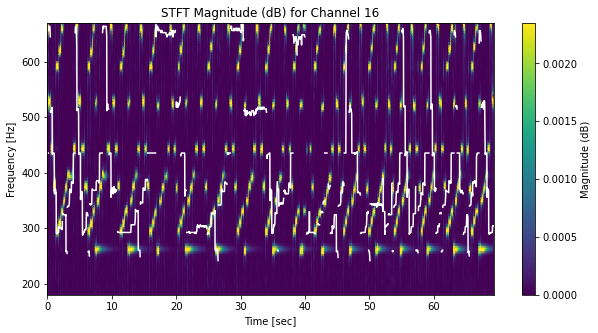

In [9]:
# VARIABLES
vmin = 0
vmax = np.abs(Zxx.max()) / 10
freq_min = 180 # in Hz, (196Hz is G3)
freq_max = 670 # in Hz, (659.3Hz is E5)


# Plot
plt.figure(figsize=(10, 5))

### pYIN
t_f = len(samples[0]) / sr
t_pyin = np.linspace(0, t_f, len(f0))  # in seconds
plt.plot(t_pyin, f0, color='white')

### STFT
plt.pcolormesh(t, f, np.abs(Zxx), vmin=vmin, vmax=vmax, shading='gouraud')
plt.ylim([freq_min,freq_max])
plt.title(f'STFT Magnitude (dB) for Channel {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar().set_label('Magnitude (dB)')
plt.savefig(f'STFT Magnitude (dB) for Channel {channel}.png', dpi=400)